<a href="https://colab.research.google.com/github/tsparaskevas/ML_EDDE3/blob/main/Bike%20rentals%20-%20Comparing%20regression%20models/Bike_rentals_Comparing_regression_models_(Homework4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Πρόβλεψη των ενοικιάσεων ποδηλάτων
###Ανάλυση και κανονικοποίηση των δεδομένων
###Σύγκριση της αποτελεσματικότητας διάφορων μοντέλων παλινδρόμησης (linear, polynominal, decision trees)

Σκοπός αυτής της εργασίας είναι η εμπέδωση της μεθοδολογίας κατασκευής γραμμικών μοντέλων πρόβλεψης και η σύγκριση της αποτελεσματικότητάς τους. Η μεθοδολογία αφορά τα εξής στάδια:

1. [Feature Engineering](https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10) - Η διαδικασία συλλογής, επεξεργασίας και μετατροπής των ακατέργαστων δεδομένων (raw data) για τη δημιουργία νέων χαρακτηριστικών (μεταβλητών) που μπορούν να χρησιμοποιηθούν στην επιβλεπόμενη (supervised) και μη επιβλεπόμενη (unsupervised) μάθηση.

2. [Exploratory Data Analysis (EDA)](https://towardsdatascience.com/applied-exploratory-data-analysis-the-power-of-visualization-bike-sharing-python-c5b2645c3595) - Η ενδελεχής ανάλυση των δεδομένων (είναι μέρος του Feature engineering). Μας επιτρέπει να:
   * εντοπίσουμε ύποπτα μοτίβα και πιθανούς τρόπους αντιμετώπισής τους
   * εκτιμήσουμε προκαταρκτικά τις μεταβλητές που επηρεάζουν το στόχο που θέλουμε να προβλέψουμε

3. Εφαρμογή και παραμετροποίηση των μοντέλων.

4. Σύγκριση της αποτελεσματικότητάς τους.

[Τα links οδηγούν στα άρθρα από τα οποία άντλησα τις πληροφορίες]

Ο περισσότερος χρόνος στο Data Science δαπανάται στο καθάρισμα και στην οργάνωση των δεδομένων.

![image.png](https://miro.medium.com/max/1400/1*7EdSHZPsEeOYPITXCKwaHA.png)

##1. Δημιουργία υπόθεσης
«Before exploring data, you should spend some time thinking about the business problem, gaining the domain knowledge and may be gaining first hand experience of the problem. This practice usually helps you form better features later on, which are not biased by the data available in the dataset» (sunil, 2015).

Πιθανοί παράγοντες που επηρεάζουν τις ενοικιάσεις ποδηλάτων:

**Η ώρα**: Θα πρέπει να υπάρχει μεγάλη ζήτηση στις ώρες προσέλευσης και αποχώρησης από τη δουλειά, χαμηλή ζήτηση από τις 10 το πρωί έως τις 4 το απόγευμα, ενώ νωρίς το πρωί και αργά το απόγευμα η ζήτηση μπορεί να έχει μεγαλύτερη διαφοροποίηση (*σ' αυτή την εργασία δεν θα χρησιμοποιήσουμε την ώρα*).

**Η μέρα**: Θα πρέπει να υπάρχει μεγαλύτερη ζήτηση από Registered χρήστες τις καθημερινές σε σύγκριση με τα ΣΚ και τις αργίες.

**Η βροχή**: Η ζήτηση θα είναι χαμηλότερη τις βροχερές μέρες σε σύγκριση με τις ηλιόλουστες. Ομοίως, η ζήτηση θα πρέπει να είναι αντιστρόφως ανάλογη της υγρασίας.

**Η θερμοκρασία**: Μάλλον η ζήτηση θα είναι ανάλογη της θερμοκρασίας

**Εξέλιξη στο χρόνο**: Η συνολική ζήτηση θα πρέπει να έχει μεγαλύτερη συσχέτιση με τους registered users, καθώς η βάση δεδομένων με τους registered θα αυξάνεται στο πέρασμα του χρόνου.

Πηγή: [Kaggle Bike Sharing Demand Prediction – How I got in top 5 percentile of participants?](https://www.analyticsvidhya.com/blog/2015/06/solution-kaggle-competition-bike-sharing-demand/)

##2. Κατανόηση των δεδομένων

In [ ]:
# Εισαγωγή βιβλιοθηκών
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
# Εισαγωγή δεδομένων (του csv από το github)
url = 'https://raw.githubusercontent.com/datajour-gr/ML-algorithms/master/week%205/day.csv'
bikedays_df = pd.read_csv(url)
bikedays_df # Επισκόπηση των δεδομένων

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
bikedays_df.dtypes # Επισκόπηση του είδους των δεδομένων

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
# Επισκόπηση στατιστικών στοιχείων για τις αριθμητικές μεταβλητές
bikedays_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Επισκόπηση των τιμών που παίρνει η κάθε μεταβλητή
date = bikedays_df['dteday'].unique().tolist()
print('1. Τιμές Date:', date)
season = bikedays_df['season'].unique().tolist()
print('2. Τιμές Season:', season)
year = bikedays_df['yr'].unique().tolist()
print('3. Τιμές Year:', year)
month = bikedays_df['mnth'].unique().tolist()
print('4. Τιμές Month:', month)
holiday = bikedays_df['holiday'].unique().tolist()
print('5. Τιμές Holiday:', holiday)
weekday = bikedays_df['weekday'].unique().tolist()
print('6. Τιμές Weekday:', weekday)
workingday = bikedays_df['workingday'].unique().tolist()
print('7. Τιμές Workingday:', workingday)
weathersit = bikedays_df['weathersit'].unique().tolist()
print('8. Τιμές Weathersit:', weathersit)
temperature = bikedays_df['temp'].unique().tolist()
print('9. Τιμές Temperature:', temperature)
feeling_temperature = bikedays_df['atemp'].unique().tolist()
print('10. Τιμές Feeling temperature:', feeling_temperature)
humidity = bikedays_df['hum'].unique().tolist()
print('11. Τιμές Humidity:', humidity)
windspeed = bikedays_df['windspeed'].unique().tolist()
print('12. Τιμές Windspeed:', windspeed)
casual = bikedays_df['casual'].unique().tolist()
print('13. Τιμές rentals by Casual users:', casual)
registered = bikedays_df['registered'].unique().tolist()
print('14. Τιμές Rentals by Registered users:', registered)
total_rentals = bikedays_df['cnt'].unique().tolist()
print('15. Τιμές Total rentals:', total_rentals)

1. Τιμές Date: ['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11', '2011-01-12', '2011-01-13', '2011-01-14', '2011-01-15', '2011-01-16', '2011-01-17', '2011-01-18', '2011-01-19', '2011-01-20', '2011-01-21', '2011-01-22', '2011-01-23', '2011-01-24', '2011-01-25', '2011-01-26', '2011-01-27', '2011-01-28', '2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01', '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05', '2011-02-06', '2011-02-07', '2011-02-08', '2011-02-09', '2011-02-10', '2011-02-11', '2011-02-12', '2011-02-13', '2011-02-14', '2011-02-15', '2011-02-16', '2011-02-17', '2011-02-18', '2011-02-19', '2011-02-20', '2011-02-21', '2011-02-22', '2011-02-23', '2011-02-24', '2011-02-25', '2011-02-26', '2011-02-27', '2011-02-28', '2011-03-01', '2011-03-02', '2011-03-03', '2011-03-04', '2011-03-05', '2011-03-06', '2011-03-07', '2011-03-08', '2011-03-09', '2011-03-10', '2011-03-11', '201

Θέλω να δω σε ποιές εποχές αντιστοιχούν οι τιμές που παίρνει το season

In [ ]:
# Από την επισκόπηση φαίνεται ότι στο season, 1=winter. Θα τσεκάρω ότι το 3=summer
bikedays_df[bikedays_df['season'] == 3].head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
171,172,2011-06-21,3,0,6,0,2,1,2,0.680833,0.637646,0.770417,0.171025,774,4061,4835


In [ ]:
# Με εκπλήσει που η πρώτη εγγραφή είναι 21/6/2011, οπότε τσεκάρω και το tail
bikedays_df[bikedays_df['season'] == 3].tail(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
630,631,2012-09-22,3,1,9,0,6,0,1,0.65,0.610488,0.646667,0.283583,2512,5883,8395


OK. Ισχύει ότι 2=summer, αλλά οι εποχές δεν αντιστοιχούν στην κλασσική ταξινόμηση των μηνών, αλλά στις ισημερίες και στα ηλιοστάσια.

Θέλω να δω τι γίνεται με το weekday. Κοίταξα στο google και βρήκα ότι 22/9/2012 ήταν Σάββατο. Άρα το weekday 0 = Sunday.

Θέλω να δω τι γίνεται με το workingday, το weekday και το holiday. Υποθέτω ότι το workingday δεν περιλαμβάνει τα ΣΚ και τα holidays και ότι το holiday περιλαμβάνει και τα ΣΚ.

In [ ]:
# Θέλω να δω αν υπάρχουν παρατηρήσεις με weekday = 0 (Κυριακή) και holiday = 0 (μη αργία)
bikedays_df[(bikedays_df['weekday'] == 0) & (bikedays_df['holiday'] == 0)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
15,16,2011-01-16,1,0,1,0,0,0,1,0.231667,0.234217,0.483750,0.188433,251,953,1204
22,23,2011-01-23,1,0,1,0,0,0,1,0.096522,0.098839,0.436522,0.246600,150,836,986
29,30,2011-01-30,1,0,1,0,0,0,1,0.216522,0.250322,0.722174,0.073983,140,956,1096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,702,2012-12-02,4,1,12,0,0,0,2,0.347500,0.359208,0.823333,0.124379,892,3757,4649
708,709,2012-12-09,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,2787,3228
715,716,2012-12-16,4,1,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742,538,3248,3786
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787


μμμ, δηλαδή το holiday δεν περιλαμβάνει τα ΣΚ;;;!!!

In [ ]:
# Ας δω πόσες αργίες υπάρχουν και τι μέρες πέφτουν
bikedays_df[bikedays_df['holiday'] == 1]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16,17,2011-01-17,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000
51,52,2011-02-21,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107
104,105,2011-04-15,2,0,4,1,5,0,1,0.446667,0.441913,0.671250,0.226375,642,2484,3126
149,150,2011-05-30,2,0,5,1,1,0,1,0.733333,0.671092,0.685000,0.131225,1549,2549,4098
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043
247,248,2011-09-05,3,0,9,1,1,0,2,0.673333,0.625646,0.790417,0.212696,1236,2115,3351
282,283,2011-10-10,4,0,10,1,1,0,1,0.570833,0.542925,0.733750,0.042304,1514,3603,5117
314,315,2011-11-11,4,0,11,1,5,0,1,0.324167,0.306817,0.446250,0.314675,440,2928,3368
327,328,2011-11-24,4,0,11,1,4,0,1,0.373333,0.372471,0.549167,0.167304,560,935,1495
359,360,2011-12-26,1,0,12,1,1,0,1,0.321739,0.315535,0.506957,0.239465,430,887,1317


Άρα, στα holiday δεν περιλαμβάνονται τα ΣΚ (δεν υπάρχουν τιμές 0 και 6 στο weekday)

Ας δω αν στο workingday περιλαμβάνονται αργίες

In [ ]:
# Αν περιλαμβάνονται δεν θα πρέπει να υπάρχει καμία εγγραφή με workingday = 1 και ταυτόχρονα holiday = 1
bikedays_df[(bikedays_df['workingday'] == 1) & (bikedays_df['holiday'] == 1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Άρα, τα holidays περιλαμβάνονται στο workingday = 0. 

Περιλαμβάνονται και τα ΣΚ στο workingday = 0;

In [ ]:
# Αν ισχύει, θα πρέπει να μην υπάρχουν εγγραφές με weekday = 0 ή 6 και workingday = 1)
bikedays_df[((bikedays_df['weekday'] == 0) | (bikedays_df['weekday'] == 6)) & (bikedays_df['workingday'] == 1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Άρα, στο workingday το 1 σημαίνει εργάσιμη και το 0 ΣΚ ή αργία.

Ας δω λίγο αν μπορώ να καταλάβω και τι σημαίνουν οι τιμές του weathersit.

In [ ]:
# θα ελέγξω τον αριθμό ενοικιάσεων ανά κατηγορία weathersit
bikedays_df.groupby('weathersit').sum('cnt')['cnt']

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

Από τα σύνολα των ενοικιάσεων, όπου στο weathersit =1 οι ενοικιάσεις είναι πολύ περισσότερες, υποθέτω ότι το 1 σημαίνει καλό καιρό. Απ' ό,τι βλέπω [εδώ](https://www.analyticsvidhya.com/blog/2015/06/solution-kaggle-competition-bike-sharing-demand/) και [εδώ](https://towardsdatascience.com/applied-exploratory-data-analysis-the-power-of-visualization-bike-sharing-python-c5b2645c3595), οι 3 κατηγορίες πρέπει να είναι 1=Clear, 2=Slightly cloudy, 3=Light snow and rain.

###Παρατηρήσεις

Τα δεδομένα περιέχουν τις ενοικιάσεις ποδηλάτων για 2 χρονιές, το 2011 και το 2012 (από 1/1/2011 έως 31/12/2012). Η πρώτη στήλη (instant) περιέχει τον αύξοντα αριθμό των παρατηρήσεων. Υπάρχουν 15 μεταβλητές, εκ των οποίων οι 12 είναι ανεξάρτητες και οι 3 εξαρτημένες.

**Εξαρτημένες μεταβλητές**:
* **dteday**: η ημερομηνία της εγγραφής, σε μορφή string
* **season**: η εποχή του έτους (ordinal, 4 κατηγορίες): 1=winter, 2=spring, 3=summer, 4=autumn
* **yr**: το έτος (ordinal, 2 κατηγορίες): 0=2011, 1=2012
* **month**: ο μήνας (ordinal, 12 κατηγορίες): 1=Ιαν, 2=Φεβ,..., 12=Δεκ
* **holiday**: αργία ή όχι, (boolean) με αντίστοιχες τιμές 1, 0
* **weekday**: η ημέρα της εβδομάδας (ordinal, 7 κατηγορίες): 0=sun, 1=mon,..., 6=sat
* **workingday**: εργάσιμη ή όχι, (boolean) με αντίστοιχες τιμές 1, 0 (στο μηδέν περιλαμβάνονται τα ΣΚ και οι αργίες) 
* **weathersit**: κατάσταση του καιρού (ordinal, 3 κατηγορίες): 1=Clear, 2=Slightly cloudy, 3=Light snow and rain (μάλλον)
* **temp**: θερμοκρασία, (scale) normalized (από 0 έως 1)
* **atemp**: αίσθηση θερμοκρασίας, (scale) normalized (από 0 έως 1)
* **humidity**: σχετική υγρασία, (scale) normalized
* **windspeed**: ταχύτητα ανέμου, (scale) normalized

**Ανεξάρτητες μεταβλητές**:
* **casual**: ενοικιάσεις από casual χρήστες
* **registered**: ενοικιάσεις από registered χρήστες
* **cnt**: συνολικές ενοικιάσεις (registered και casual μαζί) 

###Αναζήτηση ελλιπουσών και μηδενικών τιμών

In [ ]:
bikedays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Αναζήτηση ύποπτων μηδενικών τιμών
bikedays_df.isin([0]).sum()

instant         0
dteday          0
season          0
yr            365
mnth            0
holiday       710
weekday       105
workingday    231
weathersit      0
temp            0
atemp           0
hum             1
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

In [ ]:
# Αναζήτηση της παρατήρησης που το hum είναι 0
bikedays_df[bikedays_df['hum'] == 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


###Γραφήματα

Ιστογράμματα όλων των μεταβλητών

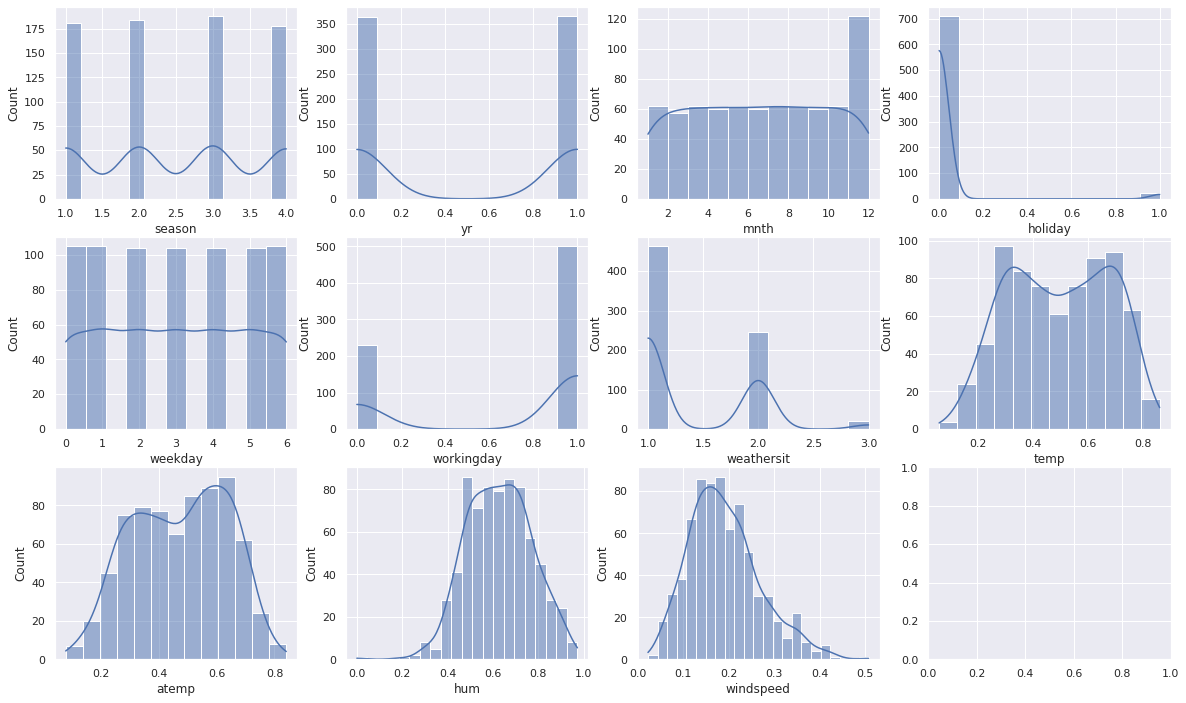

In [ ]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 4, figsize=(20, 12))

sns.histplot(data=bikedays_df, kde=True, x="season", ax=axs[0, 0])
sns.histplot(data=bikedays_df, kde=True, x="yr",ax=axs[0, 1])
sns.histplot(data=bikedays_df, kde=True, x="mnth", ax=axs[0, 2])
sns.histplot(data=bikedays_df, kde=True, x="holiday", ax=axs[0, 3])
sns.histplot(data=bikedays_df, kde=True, x="weekday", ax=axs[1, 0])
sns.histplot(data=bikedays_df, kde=True, x="workingday",ax=axs[1, 1])
sns.histplot(data=bikedays_df, kde=True, x="weathersit", ax=axs[1, 2])
sns.histplot(data=bikedays_df, kde=True, x="temp", ax=axs[1, 3])
sns.histplot(data=bikedays_df, kde=True, x="atemp", ax=axs[2, 0])
sns.histplot(data=bikedays_df, kde=True, x="hum",ax=axs[2, 1])
sns.histplot(data=bikedays_df, kde=True, x="windspeed", ax=axs[2, 2])

plt.show()

* Η εποχή (season) έχει 4 κατηγορίες με σχεδόν ίδια κατανομή.
* Το έτος (yr) έχει 2 κατηγορίες με ίδια κατανομή.
* Ο καιρός (weathersit) έχει μεγαλύτερη κατανομή στην τιμή 1 (καλός καιρός).
* Οι μέρες της εβδομάδας έχουν ίδια κατανομή.
* Οι εργάσιμες μέρες έχουν περισσότερο από διπλάσια κατανομή από τις μη εργάσιμες ημέρες, ενώ οι αργίες έχουν πολύ μικρότερη κατανομή από τις μη αργίες.
* Οι θερμοκρασίες (πραγματική και η αίσθησή της), η σχετική υγρασία και η ταχύτητα του ανέμου έχουν κανονική κατανομή.

###Registered, casual, total

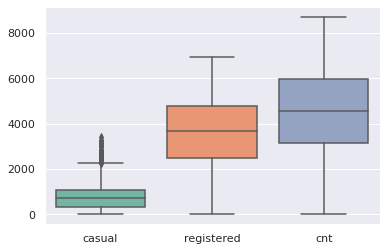

In [ ]:
# Έλεγχος διαφοροποίησης των ενοικιάσεων ανάμεσα στις registered, τις casual και τις συνολικές ενοικιάσεις
sns.boxplot(data=bikedays_df[['casual', 'registered', 'cnt']], palette="Set2") #, orient="h" αν θέλω να το κάνω οριζόντιο

###Η χρονιά

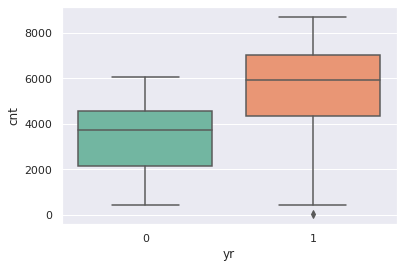

In [ ]:
# Έλεγχος διαφοροποίησης των συνολικών ενοικιάσεων, ανά έτος
sns.boxplot(data=bikedays_df, x="yr", y="cnt", palette="Set2")

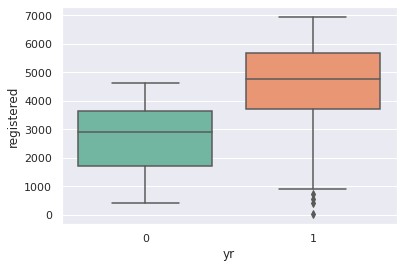

In [ ]:
# Έλεγχος διαφοροποίησης των registered ενοικιάσεων, ανά έτος
sns.boxplot(data=bikedays_df, x="yr", y="registered", palette="Set2")

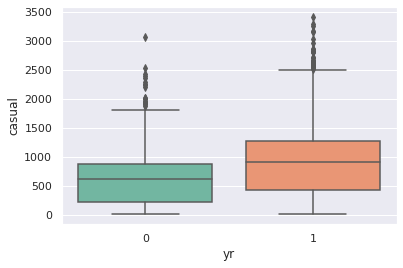

In [ ]:
# Έλεγχος διαφοροποίησης των casual ενοικιάσεων, ανά έτος
sns.boxplot(data=bikedays_df, x="yr", y="casual", palette="Set2")

Το 2012 ήταν καλύτερη χρονιά από το 2011, ιδιαίτερα για τους registered users.

###Ο μήνας

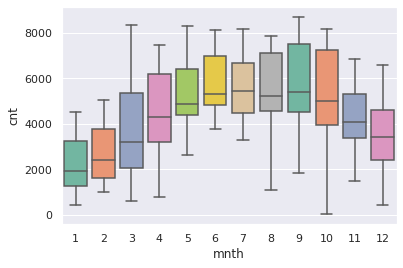

In [ ]:
# Έλεγχος διαφοροποίησης των συνολικών ενοικιάσεων, ανά μήνα
sns.boxplot(data=bikedays_df, x="mnth", y="cnt", palette="Set2")

Οι χειμερινοί μήνες είναι οι χειρότεροι και καλύτεροι οι καλοκαιρινοί.

###Η εποχή

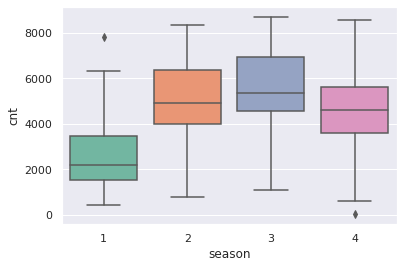

In [ ]:
# Έλεγχος της διαφοροποίησης των συνολικών ενοικιάσεων ανάλογα με την εποχή
sns.boxplot(x="season", y="cnt", data=bikedays_df, palette="Set2")

Οι καλύτερες εποχές είναι η άνοιξη και το καλοκαίρι. 

###Η μέρα της εβδομάδας

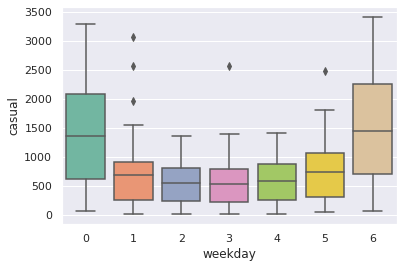

In [ ]:
# Έλεγχος της διαφοροποίησης των casual ενοικιάσεων ανά ημέρα της εβδομάδας
sns.boxplot(x="weekday", y="casual", data=bikedays_df, palette="Set2")

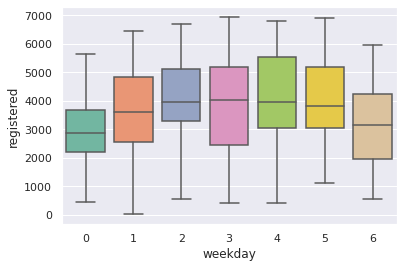

In [ ]:
# Έλεγχος της διαφοροποίησης των registered ενοικιάσεων ανά ημέρα της εβδομάδας
sns.boxplot(x="weekday", y="registered", data=bikedays_df, palette="Set2")

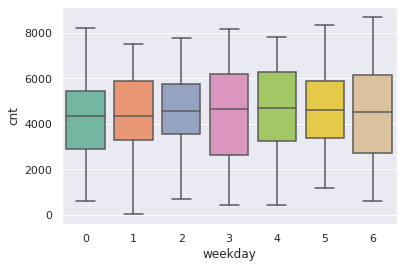

In [ ]:
# Έλεγχος της διαφοροποίησης των συνολικών ενοικιάσεων ανά ημέρα της εβδομάδας
sns.boxplot(x="weekday", y="cnt", data=bikedays_df, palette="Set2")

Οι casual νοικιάζουν περισσότερο το ΣΚ, ενώ οι registered τις εργάσιμες ημέρες.

###Οι εργάσιμες και οι αργίες

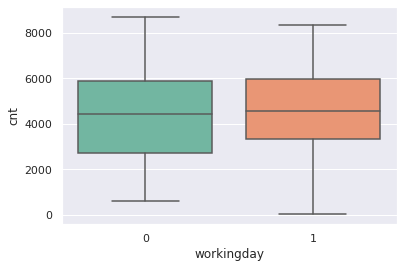

In [ ]:
# Έλεγχος της διαφοροποίησης των συνολικών ενοικιάσεων ανάλογα με το αν η μέρα είναι εργάσιμη
sns.boxplot(x="workingday", y="cnt", data=bikedays_df, palette="Set2")

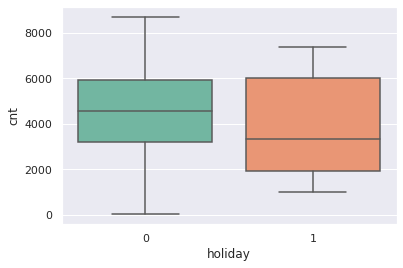

In [ ]:
# Έλεγχος της διαφοροποίησης των συνολικών ενοικιάσεων ανάλογα με το αν η μέρα είναι αργία
sns.boxplot(x="holiday", y="cnt", data=bikedays_df, palette="Set2")

####Ο καιρός

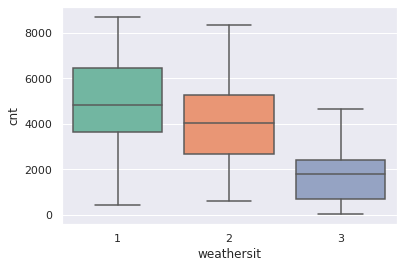

In [ ]:
# Έλεγχος της διαφοροποίησης των συνολικών ενοικιάσεων ανάλογα με τον καιρό
sns.boxplot(x="weathersit", y="cnt", data=bikedays_df, palette="Set2")

Οι συνολικές ενοικιάσεις αυξάνονται όσο καλύτερος είναι ο καιρός.

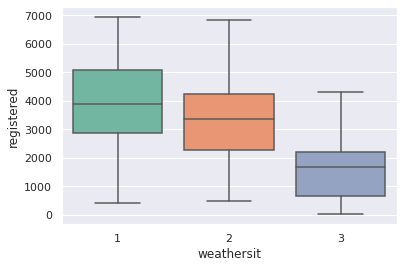

In [ ]:
# Έλεγχος της διαφοροποίησης των registered ενοικιάσεων ανάλογα με τον καιρό
sns.boxplot(x="weathersit", y="registered", data=bikedays_df, palette="Set2")

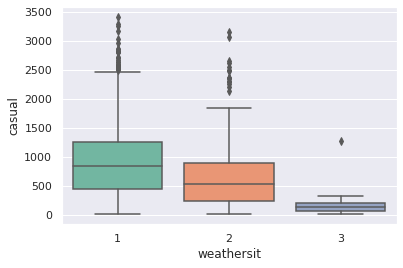

In [ ]:
# Έλεγχος της διαφοροποίησης των casual ενοικιάσεων ανάλογα με τον καιρό
sns.boxplot(x="weathersit", y="casual", data=bikedays_df, palette="Set2")

O καιρός επηρεάζει το ίδιο τους registered και τους casual. 

###Συσχέτιση μεταβλητών

####Συνεχείς μεταβλητές (θερμοκρασία, υγρασία, ταχύτητα ανέμου) μεταξύ τους και με τις ενοικιάσεις

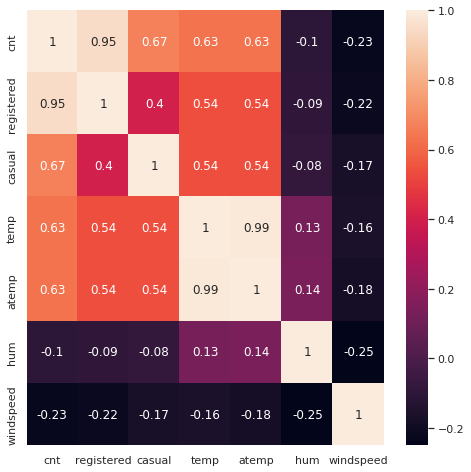

In [ ]:
# Έλεγχος της συσχέτισης των μεταβλητών μεταξύ τους (συντελεστής γραμμικής συσχέτισης του Pearson ή δειγματικός συντελεστής συσχέτισης r)R
correlation_matrix = bikedays_df[['cnt', 'registered', 'casual', 'temp', 'atemp', 'hum', 'windspeed']].corr().round(2)
# Set figure size
plt.figure(figsize=(8, 8))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

* H θερμοκρασία σχεδόν ταυτίζεται με την αίσθηση θερμοκρασίας (0.99) και έχουν την ίδια συσχέτιση με τις ενοικιάσεις
* Η θερμοκρασία σχετίζεται θετικά με τις εξαρτημένες μεταβλητές, ιδιαιτερα με τις συνολικές ενοικιάσεις
* Η ταχύτητα του ανέμου σχετίζεται αρνητικά με τις ενοικιάσεις, ιδιαίτερα των registered
* Η υγρασία σχετίζεται αρνητικά με τις ενοικιάσεις αλλά πολύ-πολύ λιγότερο, σχεδόν καθόλου 

####Όλες οι μεταβλητές μεταξύ τους

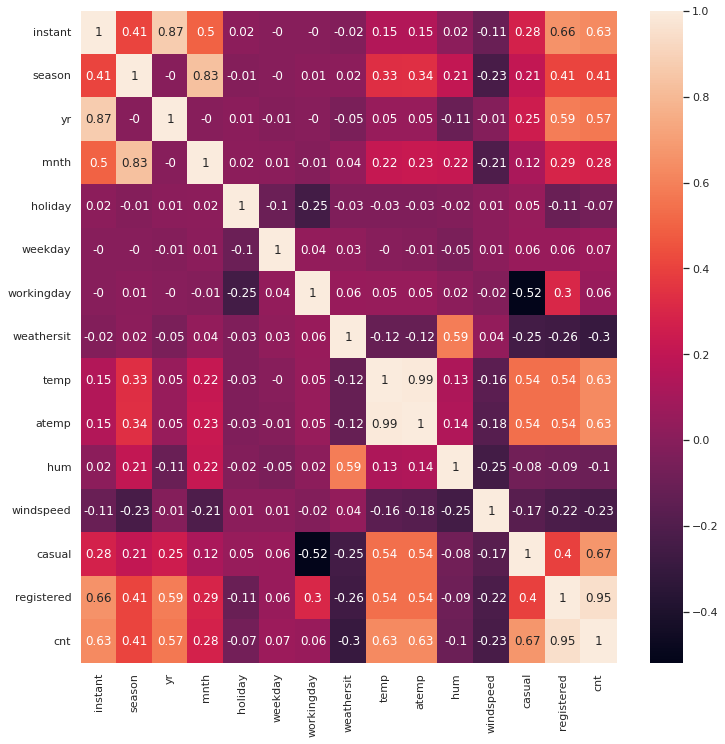

In [ ]:
# Έλεγχος της συσχέτισης των μεταβλητών μεταξύ τους (συντελεστής γραμμικής συσχέτισης του Pearson ή δειγματικός συντελεστής συσχέτισης r)R
correlation_matrix = bikedays_df.corr().round(2)
# Set figure size
plt.figure(figsize=(12, 12))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Όπως είναι αναμενώμενο, οι επιμέρους ενοικιάσεις σχετίζονται πάρα πολύ με τις συνολικές, ιδιαίτερα εκείνες των registered.

Επίσης, το mnth έχει υψηλή συσχέτιση με το season (0.83), αλλά οι δύο μεταβλητές έχουν διαφορετική συσχέτιση με τις ενοικιάσεις (το season έχει μεγαλύτερη).

###Συμπεράσματα:
1. Θα πετάξουμε τις στήλες: instant, dteday και atemp, καθώς και το holiday αφού καλύπτεται από το workingday
2. θα πετάξουμε και τις στήλες: casual και registered αφού είναι μέρος του target
3. Θα κανονικοποιήσουμε τις κατηγορικές μεταβλητές: weathersit, season, mnth και weekday

###Διαμόρφωση των δεδομένων

In [ ]:
# Διαγραφή των ανεπιθύμητων στηλών
bikedays = bikedays_df.drop(["instant", "dteday", "atemp", "holiday", "casual", "registered"],axis=1)
bikedays.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
# Μετονομασία στηλών 
bikedays.rename(columns={"yr":"Year", "mnth":"Month", "weekday":"Weekday", 
                         "workingday":"Workingday", "weathersit":"Weather",
                         "temp":"Temperature", "hum":"Humidity", "windspeed":"Wind", 
                         "season":"Season", "cnt":"Rentals"}, inplace=True)
bikedays

,Season,Year,Month,Weekday,Workingday,Weather,Temperature,Humidity,Wind,Rentals
0,1,0,1,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,4,1,2,0.254167,0.652917,0.350133,2114
727,1,1,12,5,1,2,0.253333,0.590000,0.155471,3095
728,1,1,12,6,0,2,0.253333,0.752917,0.124383,1341
729,1,1,12,0,0,1,0.255833,0.483333,0.350754,1796


In [ ]:
# Normalization των στηλών 'Season', 'Month', 'Weekday', 'Weather'
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d = bikedays[['Season', 'Month', 'Weekday', 'Weather']] # Δημιουργία νέου df με τις στήλες προς normalization
scaler.fit(d)
scaled = scaler.fit_transform(d)
scaled_df = pd.DataFrame(scaled, columns=d.columns) # Δημιουργία του normalized df
bikedata = pd.concat([scaled_df, bikedays[['Year', 'Workingday', 'Temperature', 'Humidity', 'Wind', 'Rentals']]], axis=1) # Δημιουργία νέου df με συνένωση
bikedata.head(1)

,Season,Month,Weekday,Weather,Year,Workingday,Temperature,Humidity,Wind,Rentals
0,0.0,0.0,1.0,0.5,0,0,0.344167,0.805833,0.160446,985


####Δημιουργία των training και testing sets

In [ ]:
# design matrix and target
X = bikedata.drop(['Rentals'], axis=1)
y = bikedata['Rentals']

#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

####Δημιουργία του πίνακα που θα προστίθενται τα αποτελέσματα των αξιολογήσεων κάθε μοντέλου

In [ ]:
# Δημιουργία του df
results_df = pd.DataFrame(columns=['Model', 'RMSE', 'R2'], index=[0])


##Linear regression

Training

In [ ]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

LinearRegression()

Prediction and Evaluation

In [ ]:
# Χρήση και αξιολόγηση του μοντέλου για το testing set
# Use the model to predict the test data
y_test_pred = regr.predict(X_test)
# Υπολογισμός root mean squared error
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Υπολογισμός του r squared 
r2 = r2_score(y_test, y_test_pred)

Ενημέρωση του Πίνακα αποτελεσμάτων

In [ ]:
model = "Linear Regression"
results = [model, rmse, r2]
results_df.loc[0] = results
results_df

,Model,RMSE,R2
0,Linear Regression,919.769705,0.766041


##Polynomial regression

Function για Polynominal Regression

In [ ]:
#from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on test data-set
  y_test_pred = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on test dataset
  global rmse
  rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  global r2
  r2 = r2_score(y_test, y_test_pred)
  
  #print("Polynominal performance")
  #print("RMSE:", rmse)
  #print("R2:", r2)

Κλήση του create_polynomial_regression_model() με degree = 2

In [ ]:
create_polynomial_regression_model(2)
print("Polynominal performance")
print("RMSE:", rmse)
print("R2:", r2)

Polynominal performance
RMSE: 780.5024947192464
R2: 0.8315270165885885


Κλήση του create_polynomial_regression_model() με degree = 3

In [ ]:
create_polynomial_regression_model(3)
print("Polynominal performance")
print("RMSE:", rmse)
print("R2:", r2)

Polynominal performance
RMSE: 1229.0348997501483
R2: 0.5822561103151432


To καλύτερο αποτέλεσμα το δίνει το degree=2

Κλήση του καλύτερου degree και προσθήκη του αποτελέσματος στον Πίνακα αποτελεσμάτων

In [ ]:
create_polynomial_regression_model(2)
model = "Polynominal Regression (2)"
results = [model, rmse, r2]
new_row = len(results_df)
results_df.loc[new_row] = results
results_df

,Model,RMSE,R2
0,Linear Regression,919.769705,0.766041
1,Polynominal Regression (2),780.502495,0.831527


## Δέντρα αποφάσεων

Δοκιμή με όλο το δέντρο

In [ ]:
dt = DecisionTreeRegressor()
# Fit το decision tree model
dt.fit(X_train, y_train)

DecisionTreeRegressor()

DecisionTreeRegressor performance
RMSE: 1005.052200221495
R2: 0.7206434150835589


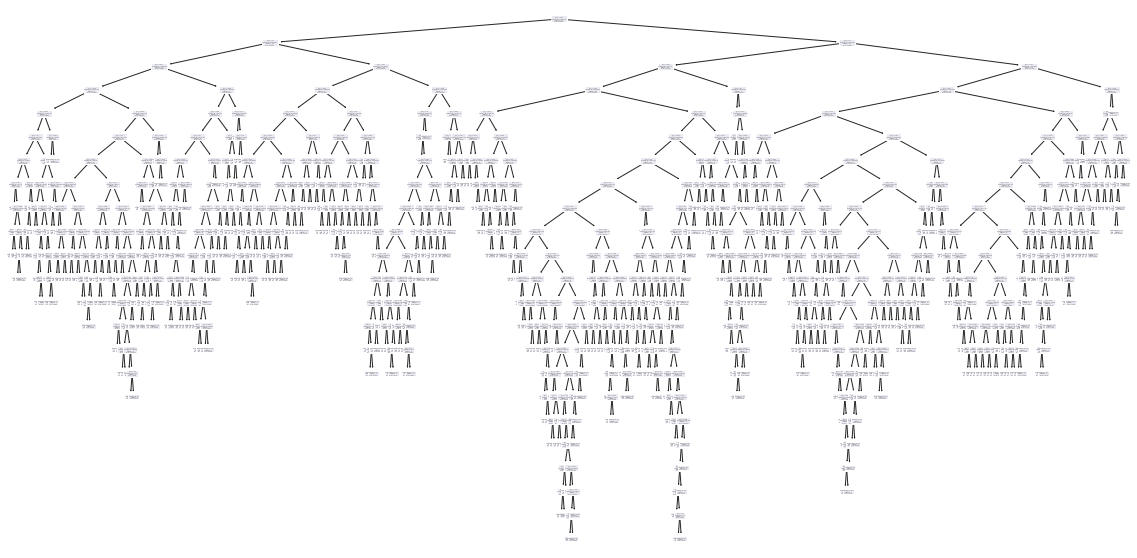

In [ ]:
# Χρήση και αξιολόγηση του μοντέλου για το testing set
# Prediction στο testing set
y_test_pred = dt.predict(X_test)
# Υπολογισμός root mean squared error
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Υπολογισμός του r squared 
r2 = r2_score(y_test, y_test_pred)

print("DecisionTreeRegressor performance")
print("RMSE:", rmse)
print("R2:", r2)

#tree plot
plt.figure(figsize=(20, 10))
sklearn.tree.plot_tree(dt)

plt.show()

To R2 είναι χειρότερο από τα προηγούμενα μοντέλα

Οι default παράμετροι του DecisionTreeRegressor είναι:

(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

Για τις δοκιμές με διάφορες τιμές στις διάφορες παραμέτρους και τα γραφήματα, συμβουλεύτηκα [αυτό το άρθρο](https://medium.com/@mohtedibf)

Δοκιμή με διαφορετικά depths (από 1 έως 20) και σύγκριση των R2.

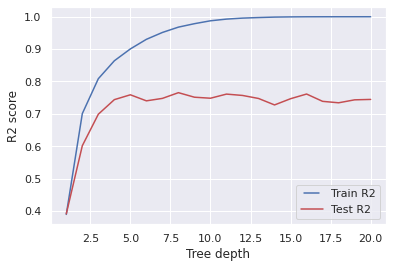

In [ ]:
max_depths = np.linspace(1, 20, 20, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeRegressor(max_depth=max_depth)
   dt.fit(X_train, y_train)
   # Prediction στο train set
   y_train_pred = dt.predict(X_train)
   r2_train = r2_score(y_train, y_train_pred)
   # Προσθήκη του R2 στη λίστα train_results
   train_results.append(r2_train)
   # Prediction στο test set
   y_test_pred = dt.predict(X_test)
   r2_test = r2_score(y_test, y_test_pred)
   # Προσθήκη του R2 στη λίστα test results
   test_results.append(r2_test)
# Γράφημα
from matplotlib.legend_handler import HandlerLine2D
#plt.figure(figsize=(10, 5))
line1, = plt.plot(max_depths, train_results, 'b', label='Train R2')
line2, = plt.plot(max_depths, test_results, 'r', label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 score')
plt.xlabel('Tree depth')
plt.show()

Βλέπουμε ότι το δέντρο κάνει overfit με depth > 8

Δοκιμή με διαφορετικά min_samples_split (από 10% έως 100% των samples) και σύγκριση των R2.

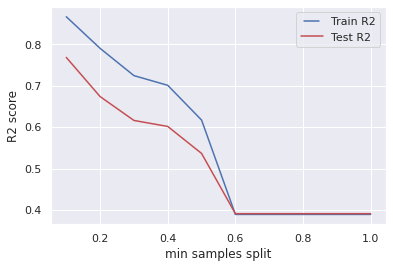

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeRegressor(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   # Prediction στο train set
   y_train_pred = dt.predict(X_train)
   r2_train = r2_score(y_train, y_train_pred)
   # Προσθήκη του R2 στη λίστα train_results
   train_results.append(r2_train)
   # Prediction στο test set
   y_test_pred = dt.predict(X_test)
   r2_test = r2_score(y_test, y_test_pred)
   # Προσθήκη του R2 στη λίστα test results
   test_results.append(r2_test)
# Γράφημα
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train R2')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 score')
plt.xlabel('min samples split')
plt.show()

Βλέπουμε ότι όταν υπολογίζουμε το 100% των samples σε κάθε node, το μοντέλο δεν μπορεί να μάθει περισσότερα, επομένως έχουμε underfitting.

Δοκιμή με διαφορετικά min_samples_leaf (the minimum number of samples required to be at a leaf node).

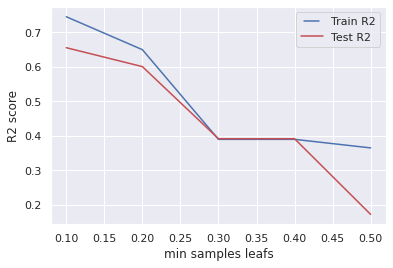

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   # Prediction στο train set
   y_train_pred = dt.predict(X_train)
   r2_train = r2_score(y_train, y_train_pred)
   # Προσθήκη του R2 στη λίστα train_results
   train_results.append(r2_train)
   # Prediction στο test set
   y_test_pred = dt.predict(X_test)
   r2_test = r2_score(y_test, y_test_pred)
   # Προσθήκη του R2 στη λίστα test results
   test_results.append(r2_test)
# Γράφημα
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train R2')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 score')
plt.xlabel('min samples leafs')
plt.show()

Το ίδιο με το min_sample_split. Η αύξησή του προκαλεί underfitting.

Δοκιμή με διαφορετικά max_features (the number of features to consider when looking for the best split).

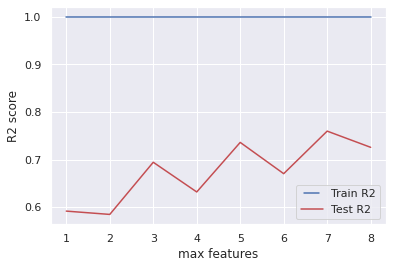

In [ ]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeRegressor(max_features=max_feature)
   dt.fit(X_train, y_train)
   # Prediction στο train set
   y_train_pred = dt.predict(X_train)
   r2_train = r2_score(y_train, y_train_pred)
   # Προσθήκη του R2 στη λίστα train_results
   train_results.append(r2_train)
   # Prediction στο test set
   y_test_pred = dt.predict(X_test)
   r2_test = r2_score(y_test, y_test_pred)
   # Προσθήκη του R2 στη λίστα test results
   test_results.append(r2_test)
# Γράφημα
line1, = plt.plot(max_features, train_results, 'b', label='Train R2')
line2, = plt.plot(max_features, test_results, 'r', label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 score')
plt.xlabel('max features')
plt.show()

Βλέπουμε ότι το μοντέλο τα πάει καλύτερα όταν λαμβάνει υπόψη του όλα τα features για να κάνει split.

Από τις παραπάνω δοκιμές συμπεραίνουμε ότι τα καλύτερα αποτελέσματα αναμένουμε να τα έχουμε με: max_depth = 8, min_samples_split=2, min_samples_leaf=1 (είναι το default) και max_features = None (default).

In [ ]:
dt = DecisionTreeRegressor(max_depth=8, min_samples_split=0.1)
# Fit το decision tree model
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=0.1)

DecisionTreeRegressor performance
RMSE: 916.6233252053158
R2: 0.7676388674704986


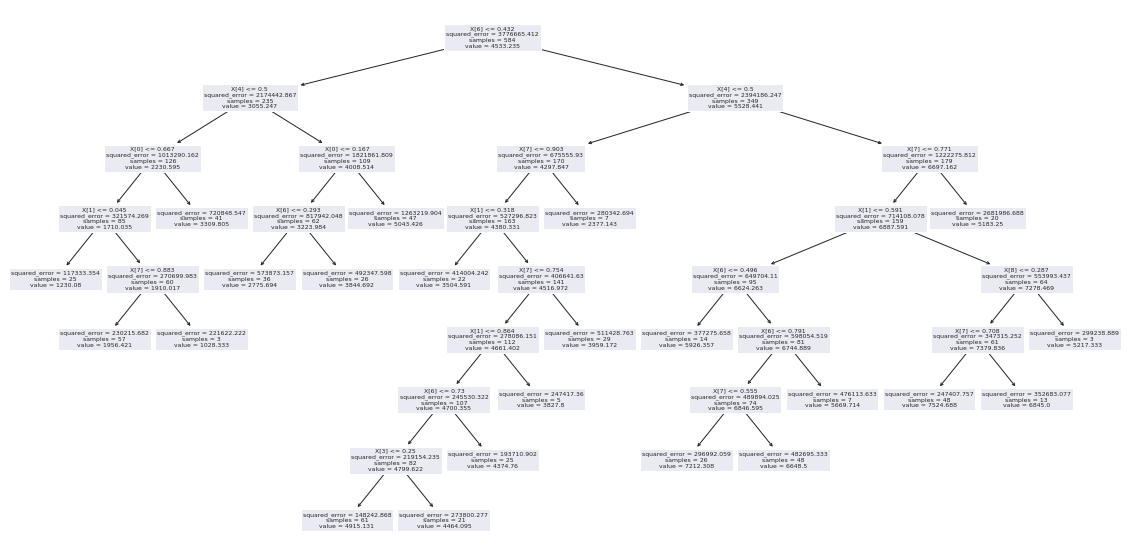

In [ ]:
# Χρήση και αξιολόγηση του μοντέλου για το testing set
# Prediction στο testing set
y_test_pred = dt.predict(X_test)
# Υπολογισμός root mean squared error
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Υπολογισμός του r squared 
r2 = r2_score(y_test, y_test_pred)

print("DecisionTreeRegressor performance")
print("RMSE:", rmse)
print("R2:", r2)

#tree plot
plt.figure(figsize=(20, 10))
sklearn.tree.plot_tree(dt)

plt.show()

In [ ]:
#import graphviz
#from sklearn.tree import export_graphviz

#dot_data = export_graphviz(dt)
#graphviz.Source(export_graphviz(dt,
                                #out_file=None,
                                #feature_names=X.columns,
                                #class_names=["0", "1"],
                                #node_ids = True,
                                #impurity=True))

H παραμετροποίηση βελτίωσε λίγο την πρόβλεψη συγκριτικά με τις default τιμές.

In [ ]:
# Ενημέρωση του αρχείου των αποτελεσμάτων
model = "DecisionTreeRegressor (max_depth=8, min_samples_split=0.1)"
results = [model, rmse, r2]
new_row = len(results_df)
results_df.loc[new_row] = results

pd.set_option('display.max_colwidth', None)
results_df

,Model,RMSE,R2
0,Linear Regression,919.769705,0.766041
1,Polynominal Regression (2),780.502495,0.831527
2,"DecisionTreeRegressor (max_depth=8, min_samples_split=0.1)",916.623325,0.767639


##Random forest

Δοκιμή με τις default παραμέτρους

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Fit το random forest model
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Χρήση και αξιολόγηση του μοντέλου για το testing set
# Prediction στο testing set
y_test_pred = rf.predict(X_test)
# Υπολογισμός root mean squared error
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Υπολογισμός του r squared 
r2 = r2_score(y_test, y_test_pred)

print("RandomForestRegressor performance")
print("RMSE:", rmse)
print("R2:", r2)

RandomForestRegressor performance
RMSE: 749.6431231220745
R2: 0.8445857638467137


To R2 είναι χειρότερο από αυτό του polynomial, αλλά καλύτερο από το decisionTreeRegressor

Οι default παράμετροι του RandomForestRegressor είναι:

(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

Δοκιμή με διαφορετικά n_estimators και σύγκριση των R2.

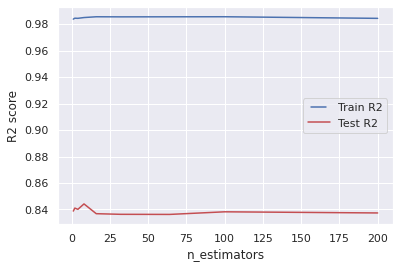

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestRegressor(max_depth=max_depth)
   rf.fit(X_train, y_train)
   # Prediction στο train set
   y_train_pred = rf.predict(X_train)
   r2_train = r2_score(y_train, y_train_pred)
   # Προσθήκη του R2 στη λίστα train_results
   train_results.append(r2_train)
   # Prediction στο test set
   y_test_pred = rf.predict(X_test)
   r2_test = r2_score(y_test, y_test_pred)
   # Προσθήκη του R2 στη λίστα test results
   test_results.append(r2_test)
# Γράφημα
from matplotlib.legend_handler import HandlerLine2D
#plt.figure(figsize=(10, 5))
line1, = plt.plot(n_estimators, train_results, 'b', label='Train R2')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 score')
plt.xlabel('n_estimators')
plt.show()

Βλέπουμε ότι το μοντέλο αποδίδει καλύτερα με 8 δέντρα

Δοκιμή με διαφορετικά max_depth και σύγκριση των R2.

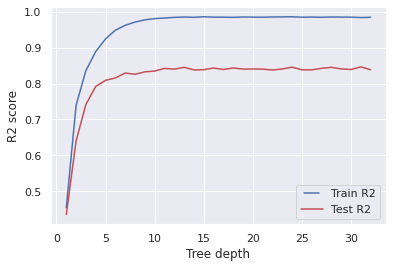

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestRegressor(max_depth=max_depth)
   rf.fit(X_train, y_train)
   # Prediction στο train set
   y_train_pred = rf.predict(X_train)
   r2_train = r2_score(y_train, y_train_pred)
   # Προσθήκη του R2 στη λίστα train_results
   train_results.append(r2_train)
   # Prediction στο test set
   y_test_pred = rf.predict(X_test)
   r2_test = r2_score(y_test, y_test_pred)
   # Προσθήκη του R2 στη λίστα test results
   test_results.append(r2_test)
# Γράφημα
from matplotlib.legend_handler import HandlerLine2D
#plt.figure(figsize=(10, 5))
line1, = plt.plot(max_depths, train_results, 'b', label='Train R2')
line2, = plt.plot(max_depths, test_results, 'r', label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 score')
plt.xlabel('Tree depth')
plt.show()

Βλέπουμε ότι το δέντρο κάνει overfit με depth > 11

Δοκιμή με διαφορετικά min_samples_split (από 10% έως 100% των samples) και σύγκριση των R2.

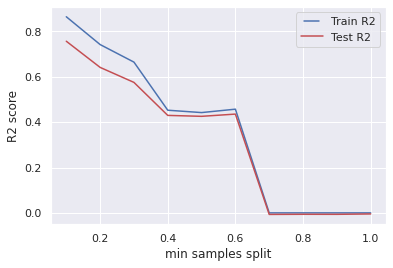

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestRegressor(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
   # Prediction στο train set
   y_train_pred = rf.predict(X_train)
   r2_train = r2_score(y_train, y_train_pred)
   # Προσθήκη του R2 στη λίστα train_results
   train_results.append(r2_train)
   # Prediction στο test set
   y_test_pred = rf.predict(X_test)
   r2_test = r2_score(y_test, y_test_pred)
   # Προσθήκη του R2 στη λίστα test results
   test_results.append(r2_test)
# Γράφημα
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train R2')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 score')
plt.xlabel('min samples split')
plt.show()

Βλέπουμε ότι όταν υπολογίζουμε το 100% των samples σε κάθε node, το μοντέλο δεν μπορεί να μάθει περισσότερα, επομένως έχουμε underfitting.

Δοκιμή με διαφορετικά min_samples_leaf (the minimum number of samples required to be at a leaf node).

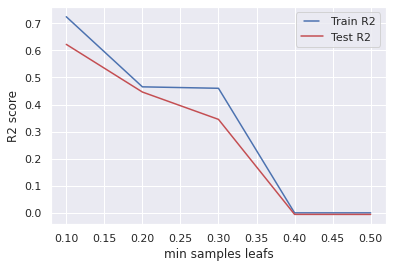

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestRegressor(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, y_train)
   # Prediction στο train set
   y_train_pred = rf.predict(X_train)
   r2_train = r2_score(y_train, y_train_pred)
   # Προσθήκη του R2 στη λίστα train_results
   train_results.append(r2_train)
   # Prediction στο test set
   y_test_pred = rf.predict(X_test)
   r2_test = r2_score(y_test, y_test_pred)
   # Προσθήκη του R2 στη λίστα test results
   test_results.append(r2_test)
# Γράφημα
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train R2')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 score')
plt.xlabel('min samples leafs')
plt.show()

Το ίδιο με το min_sample_split. Η αύξησή του προκαλεί underfitting.

Δοκιμή με διαφορετικά max_features (the number of features to consider when looking for the best split).

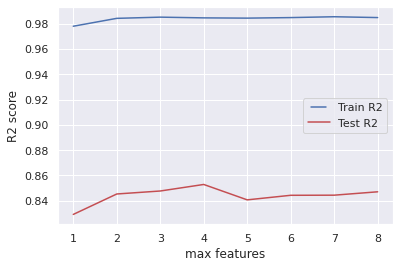

In [ ]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestRegressor(max_features=max_feature)
   rf.fit(X_train, y_train)
   # Prediction στο train set
   y_train_pred = rf.predict(X_train)
   r2_train = r2_score(y_train, y_train_pred)
   # Προσθήκη του R2 στη λίστα train_results
   train_results.append(r2_train)
   # Prediction στο test set
   y_test_pred = rf.predict(X_test)
   r2_test = r2_score(y_test, y_test_pred)
   # Προσθήκη του R2 στη λίστα test results
   test_results.append(r2_test)
# Γράφημα
line1, = plt.plot(max_features, train_results, 'b', label='Train R2')
line2, = plt.plot(max_features, test_results, 'r', label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 score')
plt.xlabel('max features')
plt.show()

Βλέπουμε ότι το μοντέλο δεν βελτιώνεται όταν λαμβάνει υπόψη του περισσότερα από 4 features για να κάνει split.

Από τις παραπάνω δοκιμές συμπεραίνουμε ότι τα καλύτερα αποτελέσματα αναμένουμε να τα έχουμε με: n_estimators=100 (default), max_depth = 11, min_samples_split=0.1, min_samples_leaf=0.1 και max_features=3.

In [ ]:
rf = RandomForestRegressor(n_estimators=4, max_depth=11, min_samples_split=0.1, min_samples_leaf=0.1, max_features=4)
# Fit το random forest model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features=4, min_samples_leaf=0.1,
                      min_samples_split=0.1, n_estimators=4)

In [ ]:
# Χρήση και αξιολόγηση του μοντέλου για το testing set
# Prediction στο testing set
y_test_pred = rf.predict(X_test)
# Υπολογισμός root mean squared error
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Υπολογισμός του r squared 
r2 = r2_score(y_test, y_test_pred)

print("DecisionTreeRegressor performance")
print("RMSE:", rmse)
print("R2:", r2)

DecisionTreeRegressor performance
RMSE: 1242.6369514929754
R2: 0.5729583807563327


Και όμως: Η παραμετροποίηση δεν βελτιώνει την πρόβλεψη συγκριτικά με τις default παραμέτρους. Επομένως, πάμε με τα default.

In [ ]:
rf = RandomForestRegressor()
# Fit το random forest model
rf.fit(X_train, y_train)

# Χρήση και αξιολόγηση του μοντέλου για το testing set
# Prediction στο testing set
y_test_pred = rf.predict(X_test)
# Υπολογισμός root mean squared error
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Υπολογισμός του r squared 
r2 = r2_score(y_test, y_test_pred)

print("DecisionTreeRegressor performance")
print("RMSE:", rmse)
print("R2:", r2)

DecisionTreeRegressor performance
RMSE: 756.6392393115667
R2: 0.8416713912147897


In [ ]:
model = "RandomForestRegressor()"
results = [model, rmse, r2]
new_row = len(results_df)
results_df.loc[new_row] = results

pd.set_option('display.max_colwidth', None)
results_df

,Model,RMSE,R2
0,Linear Regression,919.769705,0.766041
1,Polynominal Regression (2),780.502495,0.831527
2,"DecisionTreeRegressor (max_depth=8, min_samples_split=0.1)",916.623325,0.767639
3,RandomForestRegressor(),756.639239,0.841671


##**ΣΥΜΠΕΡΑΣΜΑ**
Τα καλύτερα αποτελέσματα στην πρόβλεψη στο test set τα είχα με το polynominal regression.

Το R2 των προβλέψεων αλλάζει κάθε φορά που τρέχω τον κώδικα. Υποθέτω ότι αυτό συμβαίνει επειδή κάθε φορά που το τρέχω από την αρχή αλλάζουν τα train και test sets. 

Στο feature engineering θα μπορούσα να πετάξω και τα outliers για να δω αν θα βελτιωνόταν η πρόβλεψη. Οδηγίες [εδώ](https://www.kaggle.com/code/fatmakursun/bike-sharing-feature-engineering/notebook).